# Q Learning Algorithm

<b>Q-learning</b> is a <u>model-free</u> reinforcement learning algorithm to learn the value of an action in a particular state. It does not require a model of the environment (hence "model-free").

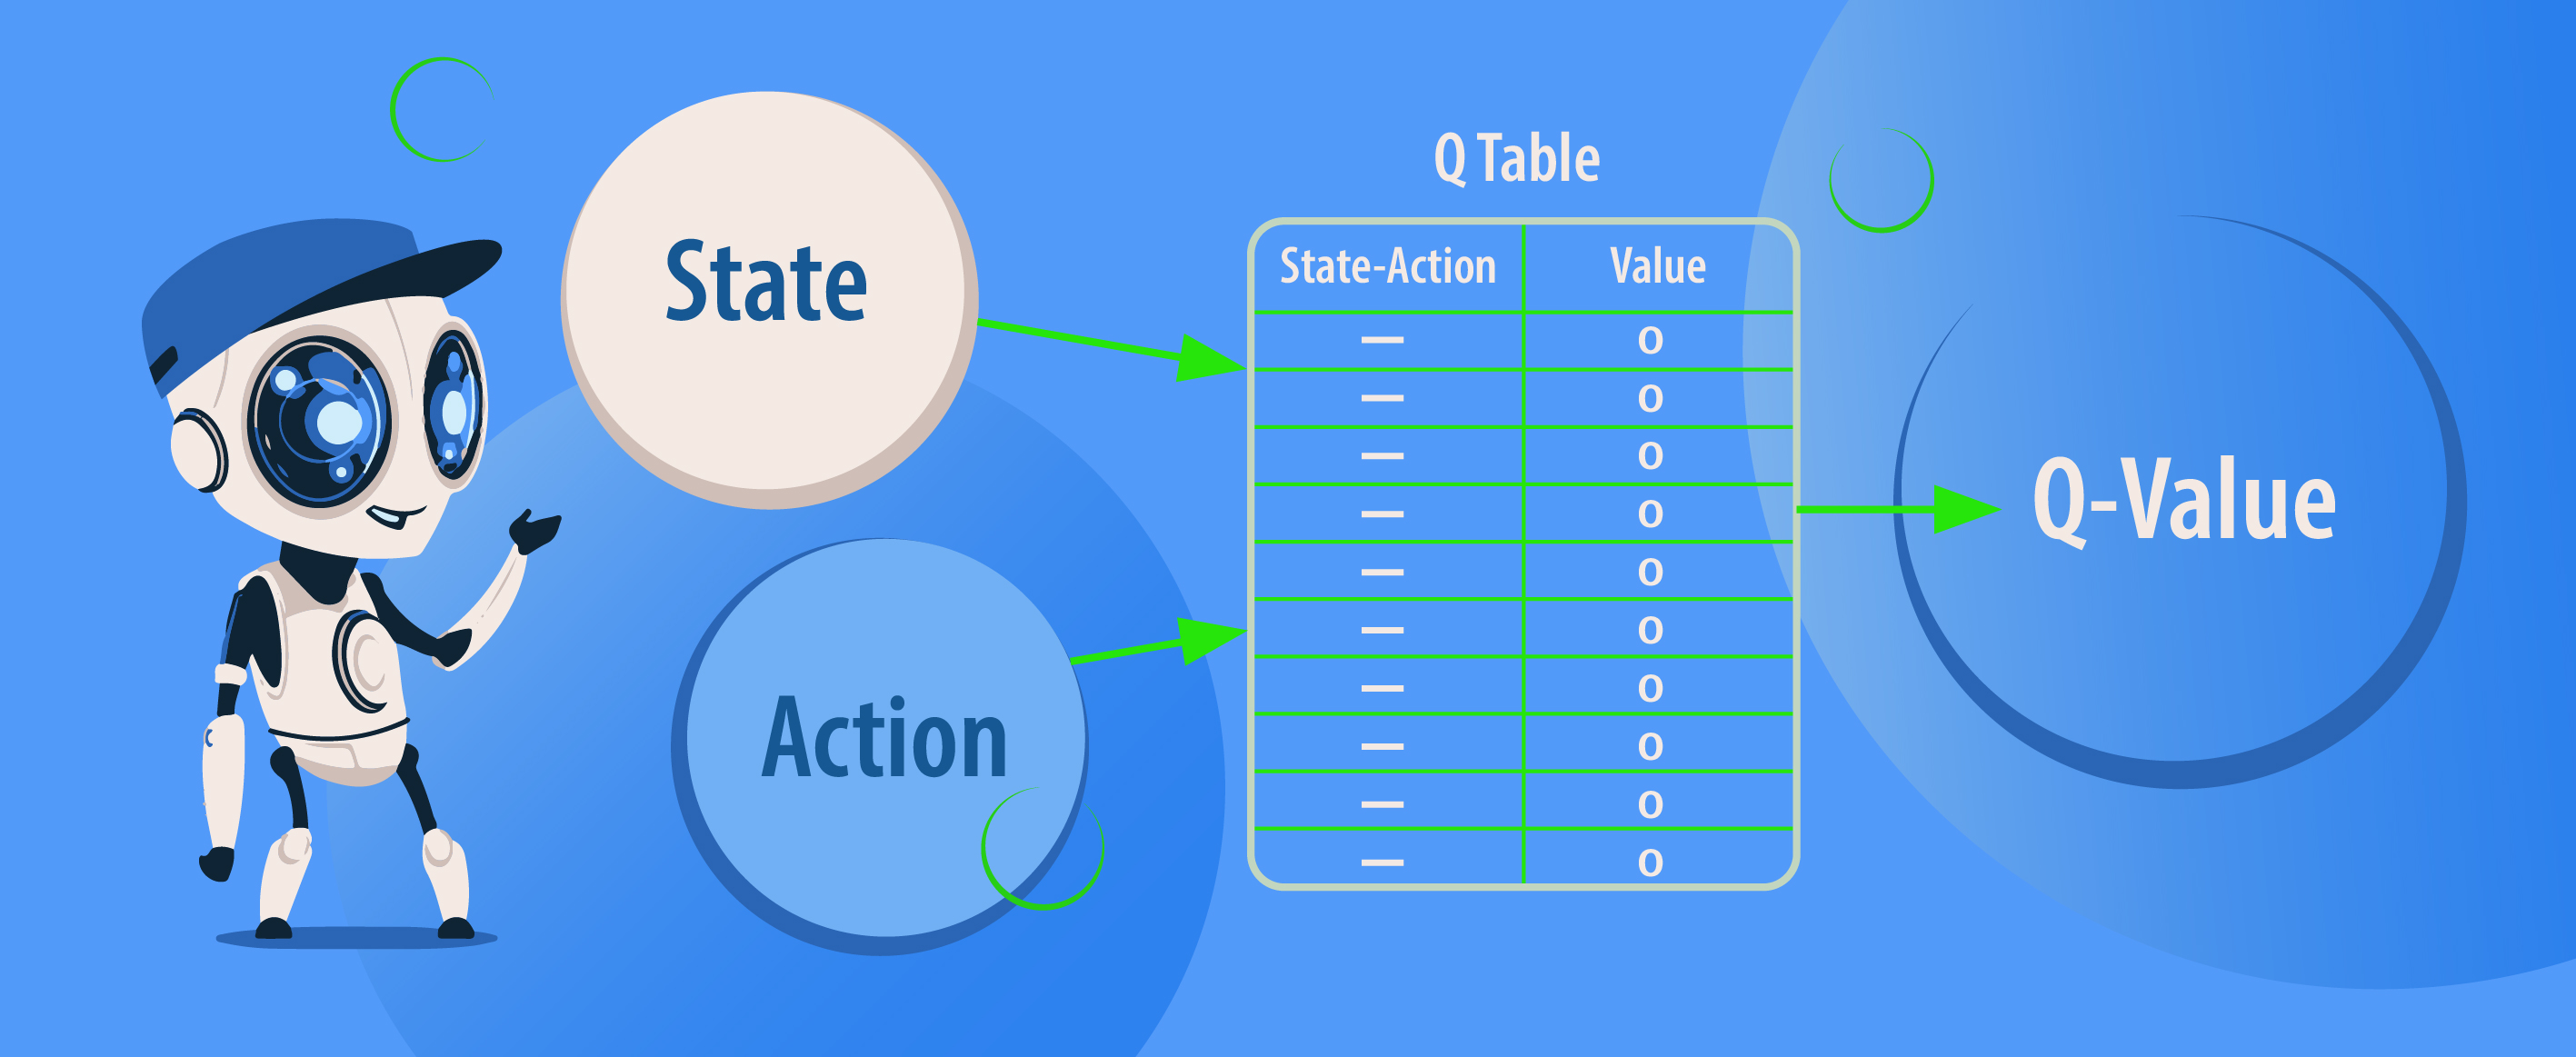

## Definitions

- $S$ - is a set of states called the state space \ observation space.

- $A$ - is a set of actions called the action space.

- $R:S\times A\times S'\rightarrow \mathbb{R}$ - is the immediate reward (or expected immediate reward) received after transitioning from state $S$ to state $S'$, due to action $A$. (In this tutorial we will use the following formula - $R:S\times A\rightarrow \mathbb{R}$)

- $\gamma \in [0,1]$ - discount factor.

- $\alpha \in (0,1]$ - learning rate \ step size.

- <b>$Q:S\times A\rightarrow \mathbb{R}$ - Q function \ Q table</b>

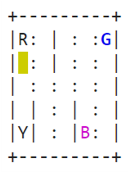

## Q-learning algorithm

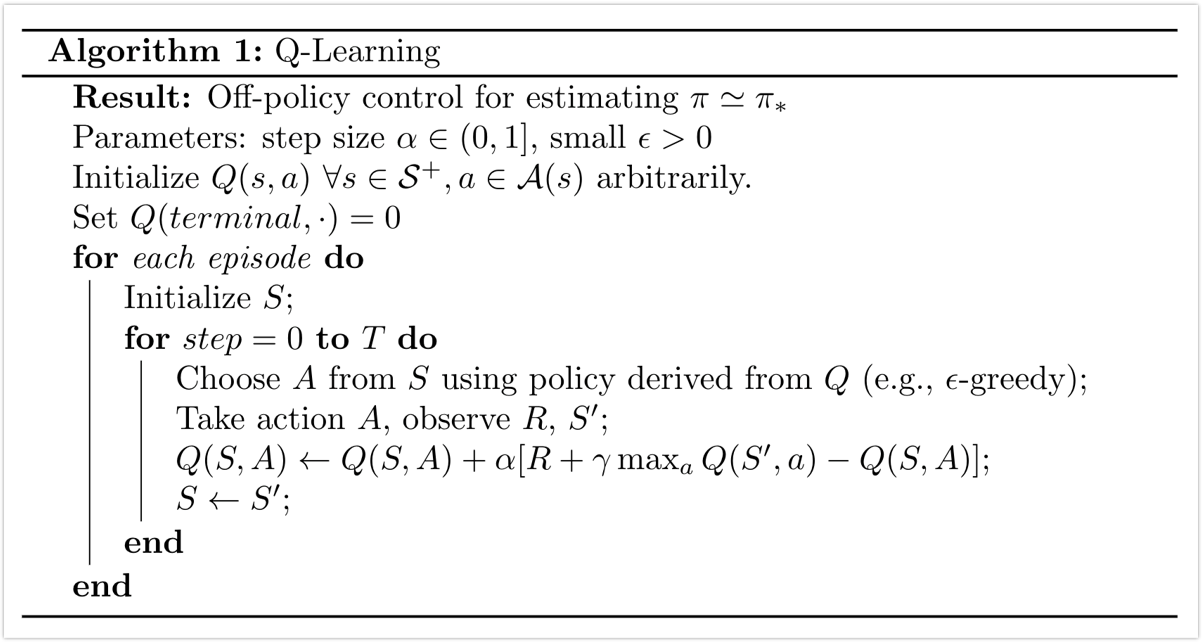

Update Q table:

<font size="5">$$𝑄^{𝑛𝑒𝑤}(𝑠_{𝑡},𝑎_{𝑡}) \leftarrow (1−\alpha)\cdot 𝑄(𝑠_{𝑡},𝑎_{𝑡}) + \alpha \cdot (r_{t} + \gamma \cdot max_{a}{𝑄(𝑠_{𝑡+1},𝑎)})$$</font>

Note that $𝑄^{𝑛𝑒𝑤}(𝑠_{𝑡},𝑎_{𝑡})$ is the sum of three factors:

1. $(1−\alpha)\cdot 𝑄(𝑠_{𝑡},𝑎_{𝑡})$ - the current value weighted by the learning rate.

2. $\alpha\cdot 𝑟_{𝑡}$ - the reward $𝑟_{r}=𝑟(𝑠_{𝑡},𝑎_{𝑡})$ to obtain if action $𝑎_{𝑡}$ is taken when in state $𝑠_{𝑡}$.

3. $\alpha\cdot\gamma\cdot max_{𝑎}{𝑄(𝑠_{𝑡+1},𝑎)}$ - the maximum reward that can be obtained from state $𝑠_{𝑡+1}$.

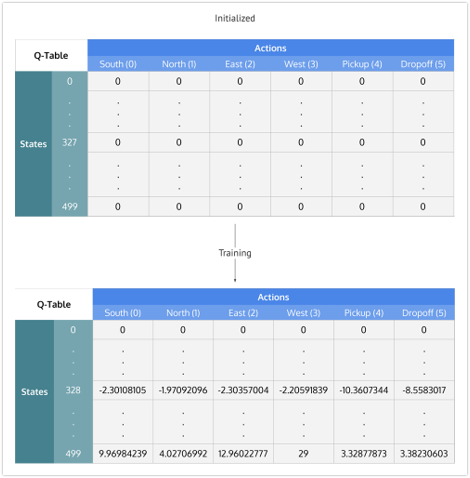

## Q-learning params

- Learning rate – 𝛼. What if 𝛼=0? What if 𝛼=1?

- Discount factor – 𝛾. What if 𝛾=0? What if 𝛾=1?

- Initial conditions – $𝑄_{0}$. Zero table / First reward / High initial value.

## Variants

- Deep Q-learning

- Double Q-learning

- Delayed Q-learning

- Greedy GQ

- Distributional Q-learning

...

## Limitations

- The standard Q-learning algorithm (using a Q table) applies only to discrete action and state spaces.

- We cant possibly transfer any knowledge if we don’t build some abstractions.

# Q Learning with OpenAI Taxi-v3 🚕 and MultiTaxiEnv 🚗🚕

In this Notebook:

1. we'll implement an agent that plays OpenAI Taxi-V3.

2. we'll implement an agent that plays MultiTaxi with <u>single taxi</u> and <u>single passenger</u>.

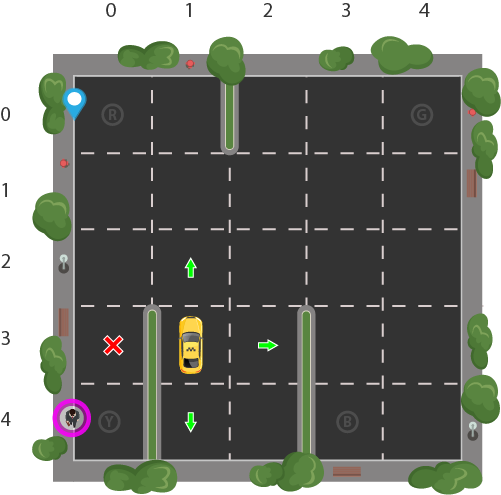

<b>The goal of this game is that our agent must pick up the passenger at one location and drop him off to the goal as fast as possible.</b>

In <u>Taxi-v3</u> there are 4 locations (marked in different letters) that the passenger is waiting in one of them and the destination is in the other. 

- You receive +20 points for a successful dropoff
- Lose 1 point for every timestep it takes. 
- There is also a 10 point penalty for illegal pick-up and drop-off actions (if you don't drop the passenger in one of the 3 other locations)

In <u>MultiTaxi</u> the position and destination of the passenger can be anywhere on the board.

- You receive +100 points for a successful dropoff
- Lose 1 point for every timestep it takes (also for illegal pick-up and drop-off actions). 

## Step 0: Import the dependencies 📚
First, we need to import the libraries <b>that we'll need to create our agent.</b></br>
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our <u>Taxi-v3</u> environment
- `Random` to generate random numbers
- `MultiTaxiEnv` for our <u>MultiTaxi</u> environment
- `super_render` another render for our <u>MultiTaxi</u> environment

In [1]:
# !pip install -q 'git+https://github.com/sarah-keren/multi-taxi'
# !pip install pygame

In [2]:
import numpy as np
import gym
import random
from multi_taxi import MultiTaxiEnv
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from Utilities.super_render import super_render

## Step 1: Create the environment 🎮
- Here we'll create the Taxi environment -> <u>Taxi-v3</u>. 

In [3]:
env = gym.make("Taxi-v3")
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



- Here we'll create the Taxi environment -> <u>MultiTaxi</u>. 

In [4]:
env_instance = MultiTaxiEnv() 
env_instance.reset()
env_instance.render()

+-----------------------+
| : |F: | : | : | : |F: |
| : | : : : | : | : | : |
| : : : : : : : : : : : |
| : : : :_: | : : : : : |
| : : : : : | : : : : : |
| : : : : : : : : : : : |
| | :G| | | :G| | | : | |
+-----------------------+
Taxi0-YELLOW: Fuel: inf, Location: (3,4), Collided: False
Passenger1: Location: (0, 11), Destination: (1, 0)
Done: False, {'taxi_0': False, '__all__': False}
Passengers Status's: [2]


- We use the `super_render` function to get relevant information about the current state in <u>MultiTaxi</u>.

In [5]:
super_render(env_instance)

[[[3, 4]], [inf], [[0, 11]], [[1, 0]], [2]]
+-----------------------------------+
|  :  |  :  |  :  |  :  |  :  |  :P0|
|D0:  |  :  :  :  |  :  |  :  |  :  |
|  :  :  :  :  :  :  :  :  :  :  :  |
|  :  :  :  :T1:  |  :  :  :  :  :  |
|  :  :  :  :  :  |  :  :  :  :  :  |
|  :  :  :  :  :  :  :  :  :  :  :  |
|  |  :  |  |  |  :  |  |  |  :  |  |
+-----------------------------------+


## Step 2: Create the Q-table and initialize it 🗄️
- Now, we'll create our Q-table, to know how many rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size

In [6]:
action_size = env.action_space.n
print("Action size ", action_size)
state_size = env.observation_space.n
print("State size ", state_size)

Action size  6
State size  500


In [7]:
action_size_multi_taxi = env_instance.action_space.n
print("Action size " ,action_size_multi_taxi)
state_size_multi_taxi = np.prod(env_instance.vector_observation_dims)
print("State size ", state_size_multi_taxi)
print("State dim ",env_instance.vector_observation_dims)

Action size  6
State size  2370816
State dim  [7, 12, 7, 12, 7, 12, 4]


- Create a Q-table for both environments:

In [8]:
qtable = np.zeros((state_size, action_size))
print("Qtable size: ", qtable.size, '\n')
print(qtable)

Qtable size:  3000 

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [9]:
qtable_multi_taxi = np.zeros((state_size_multi_taxi, action_size_multi_taxi))
print("Qtable size: ", qtable_multi_taxi.size, '\n')
print(qtable_multi_taxi)

Qtable size:  14224896 

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


- Mapping between state and row index in a table

- Option 1:

In [10]:
# [7, 12, 7, 12, 7, 12, 4]
'''
mapping_states = {}
i = 0
for a in range(7):
  for s in range(12):
    for d in range(7):
      for f in range(12):
        for g in range(7):
          for h in range(12):
            for j in range(4):
              mapping_states[(a,s,d,f,g,h,j)] = i
              i += 1
print(len(mapping_states))
''';

- Option 2:

In [11]:
def tuple_to_index(state_list,env):
    a,s,d,f,g,h,j = state_list
    A,S,D,F,G,H,J = env.vector_observation_dims
    return a + s*A + d*A*S + f*A*S*D + g*A*S*D*F + h*A*S*D*F*G + j*A*S*D*F*G*H

## Step 3: Create the hyperparameters ⚙️
- Here, we'll specify the hyperparameters.

In [12]:
total_episodes = 50000        # Total episodes
total_test_episodes = 2     # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

## Step 4: The Q learning algorithm 🧠
- Now we implement the Q learning algorithm:

1. Initialize Q-values (Q(s, a)) arbitrarily for all state-action pairs.

2. For life or until learning is stopped... 

    2.1. Choose an action (a) in the current world state (s) based on current Q-value estimates (Q(s,⋅)).
    
    2.2. Take the action (a) and observe the the outcome state (s') and reward (r). 
    
    2.3. Update $Q(s,a) := Q(s, a) + a[r + \gamma \cdot max_{a'}{Q(s', a') – Q(s, a)}]$

In [13]:
# For life or until learning is stopped
for episode in tqdm(range(total_episodes)):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        # Choose an action (a) in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 

  0%|          | 0/50000 [00:00<?, ?it/s]

- Lets plot the relationship between epsilon and the number of episodes:

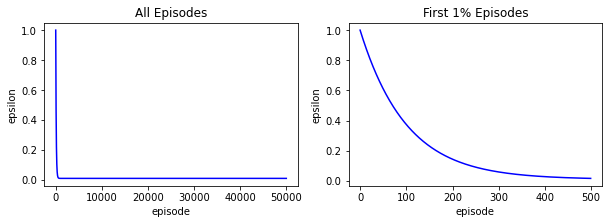

In [14]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
X = np.arange(total_episodes)
Y = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*X)
ax.plot(X, Y, 'b')
plt.setp(ax, xlabel='episode')
plt.setp(ax, ylabel='epsilon')
plt.setp(ax, title='All Episodes')


X = np.arange(total_episodes//100)
Y = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*X)
ax2.plot(X, Y, 'b')
plt.setp(ax2, xlabel='episode')
plt.setp(ax2, ylabel='epsilon')
plt.setp(ax2, title='First 1% Episodes')

plt.show()

## Step 5: Use our Q-table to play Taxi ! 🚖
- After 50 000 episodes, our Q-table can be used as a "cheatsheet" to play Taxi.
- By running this cell you can see our agent playing Taxi.

In [15]:
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        env.render()
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("\nScore over time: " +  str(sum(rewards)/total_test_episodes))

****************************************************
EPISODE  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R:_| : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : |_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: |_: :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Score 11

## Steps 2,3,4 and 5 for MultiTaxi environment 🚗🚕

Defined below is our multi-taxi Q-learning class which will be used to learn and test the action space

In [16]:
class Qlearning:
    def __init__(self, env) -> None:
        self.env = env
        self.reset_passenger_location([[0, 3]], [[6, 7]])
        self.action_size = env.action_space.n
        self.state_size = env.vector_observation_dims[0] * env.vector_observation_dims[1] * (env.vector_observation_dims[-1] - 1)

        self.qtable = np.zeros((self.state_size, self.action_size))

        # Hyperparameters
        self.total_episodes = 50000        # Total episodes
        self.total_test_episodes = 2       # Total test episodes
        self.max_steps = 99                # Max steps per episode

        self.learning_rate = 0.7           # Learning rate
        self.gamma = 0.618                 # Discounting rate

        # Exploration parameters
        self.epsilon = 1.0                 # Exploration rate
        self.max_epsilon = 1.0             # Exploration probability at start
        self.min_epsilon = 0.01            # Minimum exploration probability 
        self.decay_rate = 0.01             # Exponential decay rate for exploration prob

        # Evaluation
        self.trajectory = {}               # Saving the path
        self.rewards = {}                  # Saving the reward per state and action
    
    def reset_passenger_location(self, passenger_location, destination_location):
        self.env.state[2] = passenger_location    # Passenger location
        self.env.state[3] = destination_location  # Passenger destination

    def get_state_index(self, state):
        A,B,_,_,_,_,_ = self.env.vector_observation_dims
        return state[0] + state[1]*A + (state[-1]-1)*A*B

    def train(self):
        # For life or until learning is stopped
        for episode in tqdm(range(self.total_episodes)):

            # Reset the environment
            self.env.reset()
            self.reset_passenger_location([[0, 3]], [[6, 7]])
            state = self.env.state
            state = [state[0][0][0], state[0][0][1], state[-1][0]]
            step = 0
            done = False

            for step in range(self.max_steps):
                # Choose an action (a) in the current world state (s)
                ## First we randomize a number
                exp_exp_tradeoff = random.uniform(0,1)

                # Calculating the single index from current state space
                state_index = self.get_state_index(state)

                ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
                if exp_exp_tradeoff > self.epsilon:
                    action = np.argmax(self.qtable[state_index,:])

                # Else doing a random choice --> exploration
                else:
                    action = self.env.action_space.sample()

                # Take the action (a) and observe the outcome state(s') and reward (r)
                new_state, reward, done, info = self.env.step({'taxi_0':action})
                new_state = [new_state['taxi_0'][0], new_state['taxi_0'][1], new_state['taxi_0'][-1]]
                new_state_index = self.get_state_index(new_state)

                reward = -1 if reward['taxi_0'] < 90 else 100  # reward['taxi_0']
                self.rewards[tuple(state+[action])] = reward


                # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
                self.qtable[state_index, action] = self.qtable[state_index, action] + self.learning_rate * (reward + self.gamma * 
                                            np.max(self.qtable[new_state_index, :]) - self.qtable[state_index, action])

                # Our new state is state
                state = new_state

                # If done : finish episode
                if done['taxi_0'] == True: 
                    break

            # Reduce epsilon (because we need less and less exploration)
            self.epsilon = self.min_epsilon + (self.max_epsilon - self.min_epsilon)*np.exp(-self.decay_rate*episode) 

    def evaluation(self):
        rewards = []
        for episode in range(self.total_test_episodes):
            self.trajectory[episode] = []
            self.env.reset()
            self.reset_passenger_location([[0, 3]], [[6, 7]])
            state = self.env.state
            state = [state[0][0][0], state[0][0][1], state[-1][0]]
            step = 0
            done = False
            total_rewards = 0
            print("****************************************************")
            print("EPISODE ", episode)

            for step in range(self.max_steps):
                # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
                self.env.render()
                # Calculating a single index from current state space
                state_index = self.get_state_index(state)
                # Take the action (index) that have the maximum expected future reward given that state
                action = np.argmax(self.qtable[state_index,:])

                new_state, reward, done, info = self.env.step({'taxi_0':action})
                # print(new_state, reward, done, info)
                new_state = [new_state['taxi_0'][0], new_state['taxi_0'][1], new_state['taxi_0'][-1]]
                # print(f'state: {state}, action: {action}, next_stat: {new_state}')
                reward = -1 if reward['taxi_0'] < 90 else 100
                self.trajectory[episode].append((state, action, reward))


                total_rewards += reward

                if done['taxi_0']:
                    rewards.append(total_rewards)
                    print ("Score", total_rewards)
                    break
                state = new_state
        self.env.close()
        print(rewards)
        print ("\nScore over time: " +  str(sum(rewards)/self.total_test_episodes))

In [17]:
qlearning = Qlearning(env_instance)
print("******************************************")
print("Action size " , qlearning.action_size)
print("State size " , qlearning.state_size)
print("******************************************")
super_render(env_instance)

******************************************
Action size  6
State size  252
******************************************
[[[3, 4]], [inf], [[0, 3]], [[6, 7]], [2]]
+-----------------------------------+
|  :  |  :P0|  :  |  :  |  :  |  :  |
|  :  |  :  :  :  |  :  |  :  |  :  |
|  :  :  :  :  :  :  :  :  :  :  :  |
|  :  :  :  :T1:  |  :  :  :  :  :  |
|  :  :  :  :  :  |  :  :  :  :  :  |
|  :  :  :  :  :  :  :  :  :  :  :  |
|  |  :  |  |  |  :  |D0|  |  :  |  |
+-----------------------------------+


- <b>Train the model (you can load a qtable from npy file)</b>

In [18]:
qlearning.train()

  0%|          | 0/50000 [00:00<?, ?it/s]

- Optional: Save qtable to npy file

In [19]:
np.save('Utilities/qtable_multi_taxi.npy', qlearning.qtable)

- Optional: Load qtable from npy file

In [20]:
qtable_multi_taxi = np.load('Utilities/qtable_multi_taxi.npy')
print(qtable_multi_taxi)
# qlearning = Qlearning(env_instance)
# qlearning.qtable = qtable_multi_taxi

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 ...
 [-0.7        -0.7         0.          0.          0.          0.        ]
 [-0.7         0.          0.          0.          0.         -1.83035435]
 [-0.7        -0.7         0.          0.          0.          0.        ]]


In [21]:
qlearning.evaluation()

****************************************************
EPISODE  0
+-----------------------+
| : |F: | : | : | : |F: |
| : | : : : | : | : | : |
| : : : : : : : : : : : |
| : : : : : | : : : : : |
| : : : : : | : : : : : |
| : : : : : : : : : : : |
| | :G| | | :G| | | : | |
+-----------------------+
Taxi0-YELLOW: Fuel: inf, Location: (0,3), Collided: False
Passenger1: Location: (0, 3), Destination: (6, 7)
Done: False, {'taxi_0': False, '__all__': False}
Passengers Status's: [2]
+-----------------------+
| : |F: | : | : | : |F: |
| : | : : : | : | : | : |
| : : : : : : : : : : : |
| : : : : : | : : : : : |
| : : : : : | : : : : : |
| : : : : : : : : : : : |
| | :G| | | :G| | | : | |
+-----------------------+
Taxi0-YELLOW: Fuel: inf, Location: (0,3), Collided: False
Passenger1: Location: Taxi1, Destination: (6, 7)
Done: False, {'taxi_0': False, '__all__': False}
Passengers Status's: [3]
+-----------------------+
| : |F: | : | : | : |F: |
| : | : : : | : | : | : |
| : : : : : : : : : : : |
|

- We can get information about the path in the evaluation set:

In [22]:
test_number = 0
qlearning.trajectory[test_number]

[([0, 3, 2], 4, -1),
 ([0, 3, 3], 0, -1),
 ([1, 3, 3], 0, -1),
 ([2, 3, 3], 2, -1),
 ([2, 4, 3], 0, -1),
 ([3, 4, 3], 0, -1),
 ([4, 4, 3], 2, -1),
 ([4, 5, 3], 0, -1),
 ([5, 5, 3], 2, -1),
 ([5, 6, 3], 2, -1),
 ([5, 7, 3], 0, -1),
 ([6, 7, 3], 5, 100)]

In [23]:
qlearning.rewards

{(6, 3, 2, 2): -1,
 (6, 3, 2, 5): -1,
 (6, 3, 2, 4): -1,
 (6, 3, 2, 1): -1,
 (5, 3, 2, 4): -1,
 (5, 3, 2, 0): -1,
 (6, 3, 2, 3): -1,
 (5, 3, 2, 1): -1,
 (4, 3, 2, 1): -1,
 (3, 3, 2, 4): -1,
 (3, 3, 2, 2): -1,
 (3, 4, 2, 1): -1,
 (2, 4, 2, 2): -1,
 (2, 5, 2, 3): -1,
 (2, 4, 2, 5): -1,
 (2, 4, 2, 0): -1,
 (3, 4, 2, 0): -1,
 (4, 4, 2, 3): -1,
 (4, 3, 2, 2): -1,
 (4, 4, 2, 4): -1,
 (4, 4, 2, 2): -1,
 (4, 5, 2, 4): -1,
 (4, 5, 2, 3): -1,
 (4, 4, 2, 5): -1,
 (4, 4, 2, 1): -1,
 (4, 3, 2, 5): -1,
 (4, 3, 2, 3): -1,
 (4, 2, 2, 4): -1,
 (4, 2, 2, 1): -1,
 (3, 2, 2, 3): -1,
 (3, 1, 2, 5): -1,
 (3, 1, 2, 3): -1,
 (3, 0, 2, 1): -1,
 (2, 0, 2, 3): -1,
 (2, 0, 2, 2): -1,
 (2, 1, 2, 2): -1,
 (2, 2, 2, 1): -1,
 (1, 2, 2, 4): -1,
 (1, 2, 2, 3): -1,
 (1, 2, 2, 2): -1,
 (1, 3, 2, 0): -1,
 (2, 3, 2, 4): -1,
 (2, 3, 2, 3): -1,
 (2, 2, 2, 0): -1,
 (3, 2, 2, 1): -1,
 (2, 2, 2, 2): -1,
 (2, 3, 2, 2): -1,
 (2, 4, 2, 1): -1,
 (1, 4, 2, 2): -1,
 (1, 5, 2, 2): -1,
 (1, 5, 2, 0): -1,
 (2, 5, 2, 0): -1,
 (3, 5, 2, 4

# Q Learning with OpenAI Simple Speaker Listener Environment 🗣👂 and Nevigator Environment 🔴⚪    

In this Notebook:

1. We'll implement an agent on OpenAI <u>Simple Speaker Listener Env</u> 🙊 🙉. 

2. We'll implement an agent on <u>Nevigator Env</u> 🔴⚪.

Lets start with <u>Simple Speaker Listener Env</u>

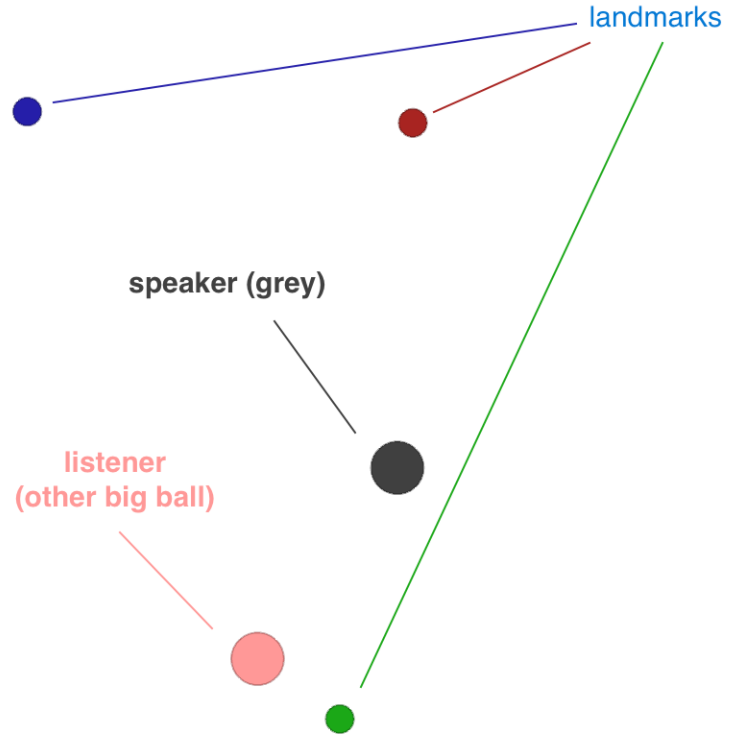

The Simple Speaker Listener Environment is implemented in the MPE library. It is a 2-agent environment in which one agent, the "speaker", has information about the goal and has a limmited mode of communication with the second agent, the "listener", which must use the speaker's communications and its limitted observations to navigate a 2D space toward the goal. The speaker agent cannot navigate, and the listener object cannot communicate.

## Step 0: Import the dependencies 📚
First, we need to import the libraries <b>that we'll need to create our agent.</b></br>
We use 3 libraries:
- `Numpy` for our Qtable
- `pettingzoo` for our Simple speaker listener agents
- `Random` to generate random numbers
- `Image` to identify what color the speaker is getting as a state
- `simple_v2` and `BaseParallelWraper` used for the Nevigator

In [24]:
# !pip install 'pettingzoo[mpe]'

In [25]:
from pettingzoo.mpe import simple_speaker_listener_v3
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from PIL import Image
import random

from pettingzoo.mpe import simple_v2
from pettingzoo.utils.wrappers import BaseParallelWraper

## Step 1: Create the environment 🎮
- Here we'll create the SL environment. 

In [26]:
env = simple_speaker_listener_v3.env(continuous_actions=False)
env.reset()
        
for i, agent in enumerate(env.agents, 1):
    print(f'- agent {i}: {agent}')
    print(f'\t- observation space: {env.observation_space(agent)}')
    print(f'\t- action space: {env.action_space(agent)}')

- agent 1: speaker_0
	- observation space: Box(-inf, inf, (3,), float32)
	- action space: Discrete(3)
- agent 2: listener_0
	- observation space: Box(-inf, inf, (11,), float32)
	- action space: Discrete(5)


<b>Mapping between an action name and an actual action:</b>

<u>speaker action-to-index dict</u>

SPEAKER_DISCRETE_ACTIONS = {

    'A': 0,
    
    'B': 1,
    
    'C': 2
}

<u>listener action-to-index dict</u>

LISTENER_DISCRETE_ACTIONS = {

    'nothing': 0,
    
    'left':    1,
    
    'right':   2,
    
    'down':    3,
    
    'up':      4
}

In [27]:
for i in range(2):
    #speaker action
    obs, _, _, _ = env.last()
    print(f'agnet: {env.agents[0]}')
    print(f'observation: {obs}')
    display(Image.new('RGB',(220,20),tuple([int(x) for x in np.round(obs*100)])))
    print()
    env.step(0)  # A
    
    # listener action
    obs, _, _, _ = env.last()
    print(f'agnet: {env.agents[1]}')
    print(f'observation: {obs}')
    print()
    env.step(1)  # left

agnet: speaker_0
observation: [0.15 0.15 0.65]



agnet: listener_0
observation: [0.         0.         0.6685298  0.38457367 0.6373272  0.8188653
 1.1233832  0.49769664 0.         0.         0.        ]

agnet: speaker_0
observation: [0.15 0.15 0.65]



agnet: listener_0
observation: [-0.5         0.          0.7185298   0.38457367  0.6873272   0.8188653
  1.1733831   0.49769664  1.          0.          0.        ]



## Step 2: Create the Q-table and initialize it 🗄️
- Now, we'll create our Q-table, to know how many rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size

In [28]:
speaker, listener = env.agents
speaker_action_size = env.action_space(speaker).n
print("Speaker action size: ", speaker_action_size)
speaker_state_size = env.observation_space(speaker).shape[0]
print("Speaker state dim: ", speaker_state_size)
print()
listener_action_size = env.action_space(listener).n
print("Listener action size: ", listener_action_size)
listener_state_size = env.observation_space(listener).shape[0]
print("Listener state dim: ", listener_state_size)

Speaker action size:  3
Speaker state dim:  3

Listener action size:  5
Listener state dim:  11


- Lets try to discretize the listener state size and calculate the Q table size:

In [29]:
'''Listener discretize the state size'''
dim_1 = 5   # listener agent velocity X
dim_2 = 5   # listener agent velocity Y
dim_3 = 5   # red landmark X pos - listener agent X pos
dim_4 = 5   # red landmark Y pos - listener agent Y pos
dim_5 = 5   # blue landmark X pos - listener agent X pos
dim_6 = 5   # blue landmark Y pos - listener agent Y pos
dim_7 = 5   # green landmark X pos - listener agent X pos
dim_8 = 5   # green landmark Y pos - listener agent Y pos
dim_9 = 2   # communication channel 1
dim_10 = 2  # communication channel 2
dim_11 = 2  # communication channel 3
listener_state_size = dim_1 * dim_2 * dim_3 * dim_4 * dim_5 * dim_6 * dim_7 * dim_8 * dim_9 * dim_10 * dim_11

qtable_size = listener_state_size * listener_action_size
qtable_size

15625000

- The number of states is too <b>large</b>. We should use huge number of episode for succession to learn the model and feed the Q table.

There already exists a single-agent and single-landmark version of Simple Speaker Listener, called Simple. Here, the one agent acts like the listener and has a simplified observation space containing the agent's velocity and the landmark's relative location. There are other, more complex environments in the MPE library and other environment libraries in PettingZoo. You can explore them in the PettingZoo Website.

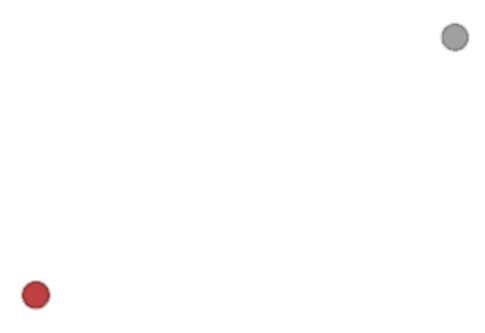

Lets continue with Nevigator environment.

## Step 1: Create the environment for Nevigator environment 🎮
- Here we'll create the Nevigator environment. 

In [30]:
class SingleAgentParallelEnvGymWrapper(BaseParallelWraper):
    """
    A wrapper for single-agent parallel environments aligning the environments'
    API with OpenAI Gym.
    """

    def reset(self):
        # run `reset` as usual.
        # returned value is a dictionary of observations with a single entry
        obs = self.env.reset()

        # return the single entry value as is.
        # no need for the key (only one agent)
        return next(iter(obs.values()))

    def step(self, action):
        # step using "joint action" of a single agnet as a dictionary
        step_rets = self.env.step({self.env.agents[0]: action})

        # unpack step return values from their dictionaries
        return tuple(next(iter(ret.values())) for ret in step_rets)

    @property  # make property for gym-like access
    def action_space(self, _=None):  # ignore second argument in API
        # get action space of the single agent
        return self.env.action_space(self.env.possible_agents[0])

    @property  # make property for gym-like access
    def observation_space(self, _=None):  # ignore second argument in API
        # get observation space of the single agent
        return self.env.observation_space(self.env.possible_agents[0])

In [31]:
simple_gym_env = simple_v2.parallel_env(max_cycles=10, continuous_actions=False)
simple_gym_env = SingleAgentParallelEnvGymWrapper(simple_gym_env)

<b>Mapping between an action name and an actual action:</b>

<u>action-to-index dict</u>

DISCRETE_ACTIONS = {

    'nothing': 0,
    
    'increase velocity to left':    1,
    
    'increase velocity to right':   2,
    
    'increase velocity to down':    3,
    
    'increase velocity to up':      4
}

- Lets look on example of state, action and reward

In [32]:
observation = simple_gym_env.reset()

for i in range(5):
    # choose an action and execute
    action = i
    observation, reward, done, info = simple_gym_env.step(action)
    
    print(f'step {i}')
    print(f'reward:      {reward}')
    print(f'observation: {observation}')
    print(f'action:      {action}')
    print()

step 0
reward:      -0.15009785536977416
observation: [0.         0.         0.19384743 0.33544153]
action:      0

step 1
reward:      -0.17198259876964678
observation: [-0.5         0.          0.24384743  0.33544153]
action:      1

step 2
reward:      -0.16604266291967862
observation: [0.125      0.         0.23134743 0.33544153]
action:      2

step 3
reward:      -0.19783694329795906
observation: [ 0.09375    -0.5         0.22197244  0.38544154]
action:      3

step 4
reward:      -0.18528510588622532
observation: [0.0703125  0.125      0.21494119 0.37294155]
action:      4



## Step 2: Create the Q-table and initialize it for Nevigator environment🗄️
- Now, we'll create our Q-table, to know how many rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size

In [33]:
action_size = simple_gym_env.action_space.n
print("Action size ", action_size)
state_dim = simple_gym_env.observation_space
print("State dim ", state_dim.shape[0])
dim_1 = 21     # listener agent velocity X
dim_2 = 21     # listener agent velocity Y
dim_3 = 25     # landmark X pos - listener agent X pos
dim_4 = 25     # landmark Y pos - listener agent Y pos
state_size = dim_1 * dim_2 * dim_3 * dim_4
print("State size ", state_size)

Action size  5
State dim  4
State size  275625


In [34]:
qtable = np.zeros((state_size, action_size))
print("Qtable size: ", qtable.size, '\n')
print(qtable)

Qtable size:  1378125 

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [35]:
def velocity_to_index(velocity):
    if velocity < -2:
        print(f"Velocity is out of range! velocity = {velocity}")
        velocity = -2
    if velocity > 2:
        print(f"Velocity is out of range! velocity = {velocity}")
        velocity = 2    
    return int((round(velocity / 0.2) * 0.2 + 2) / 2 * 10)

def distance_to_index(distance):
    if distance < -2.4:
        # print(f"Distance is out of range! distance = {distance}")
        distance = -2.4 
    if distance > 2.4:
        # print(f"Distance is out of range! distance = {distance}")
        distance = 2.4 
    return int((round(distance / 0.2) * 0.2 + 2.4) / 2 * 10)

def tuple_to_index(state_list):
    v_x,v_y,d_x,d_y = state_list
    v_x,v_y,d_x,d_y = velocity_to_index(v_x), velocity_to_index(v_y), distance_to_index(d_x), distance_to_index(d_y)
    return v_x + v_y*dim_1 + d_x*dim_1*dim_2 + d_y*dim_1*dim_2*dim_3

## Step 3: Create the hyperparameters for Nevigator environment ⚙️
- Here, we'll specify the hyperparameters.

In [36]:
total_episodes = 500000       # Total episodes
total_test_episodes = 20      # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

## Step 4: The Q learning algorithm for Nevigator environment 🧠
- Now we implement the Q learning algorithm:

1. Initialize Q-values (Q(s, a)) arbitrarily for all state-action pairs.

2. For life or until learning is stopped... 

    2.1. Choose an action (a) in the current world state (s) based on current Q-value estimates (Q(s,⋅)).
    
    2.2. Take the action (a) and observe the the outcome state (s') and reward (r). 
    
    2.3. Update $Q(s,a) := Q(s, a) + a[r + \gamma \cdot max_{a'}{Q(s', a') – Q(s, a)}]$
    
- <b>Train the model (you can load the qtable from npy file)</b>

In [37]:
# For life or until learning is stopped
for episode in tqdm(range(total_episodes)):
    # Reset the environment
    state = simple_gym_env.reset()
    step = 0
    done = False
    
    for step in range(max_steps):
        # Choose an action (a) in the current world state (s)
        state_index = tuple_to_index(state)

        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state_index,:])
        
        # Else doing a random choice --> exploration
        else:
            action = simple_gym_env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = simple_gym_env.step(action)

        state_new_index = tuple_to_index(new_state)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state_index, action] = qtable[state_index, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[state_new_index, :]) - qtable[state_index, action])
                
        # Our new state is state
        state = new_state
        
        # If done : finish episode
        if done == True: 
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 

  0%|          | 0/500000 [00:00<?, ?it/s]

- Optional: Save qtable to npy file

In [38]:
np.save('Utilities/qtable_nevigator.npy', qtable)

- Optional: Load qtable from npy file

In [39]:
qtable = np.load('Utilities/qtable_nevigator.npy')
print(qtable)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Step 5: Use our Q-table to run Nevigator agent ! 🧭
- After 500 000 episodes, our Q-table can be used as a "cheatsheet" to run the Nevigator.
- By running this cell you can see our agent runnig.

In [40]:
from time import sleep
rewards = []

for episode in range(total_test_episodes):
    state = simple_gym_env.reset()
    step = 0
    done = False
    total_rewards = 0
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        sleep(0.15)
        simple_gym_env.render()
        # plt.imshow(simple_gym_env.render('rgb_array'))
        # Take the action (index) that have the maximum expected future reward given that state
        state_index = tuple_to_index(state)
        action = np.argmax(qtable[state_index,:])
        
        new_state, reward, done, info = simple_gym_env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            print ("Score", total_rewards)
            break
        state = new_state
simple_gym_env.close()
print ("\nScore over time: " +  str(sum(rewards)/total_test_episodes))

****************************************************
EPISODE  0
Score -5.503390521752726
****************************************************
EPISODE  1
Score -1.9087604602457107
****************************************************
EPISODE  2
Score -16.041516018804323
****************************************************
EPISODE  3
Score -50.362248308407814
****************************************************
EPISODE  4
Score -4.354643346808685
****************************************************
EPISODE  5
Score -2.5446454622784906
****************************************************
EPISODE  6
Score -0.04767500488429786
****************************************************
EPISODE  7
Score -3.7662235281485708
****************************************************
EPISODE  8
Score -0.4922886154732697
****************************************************
EPISODE  9
Score -0.08219862028734667
****************************************************
EPISODE  10
Score -5.120929221469063
**********